In [1]:
import numpy as np 
import pandas as pd 
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, GlobalAveragePooling2D, Dropout, Flatten
from tensorflow.keras.applications import VGG16
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_ds="/kaggle/input/birds-20-species-image-classification/train"
test_ds="/kaggle/input/birds-20-species-image-classification/test"
validation_ds="/kaggle/input/birds-20-species-image-classification/valid"

In [3]:
os.listdir('/kaggle/input/birds-20-species-image-classification/train')

['AMERICAN KESTREL',
 'AMERICAN GOLDFINCH',
 'AFRICAN PYGMY GOOSE',
 'ABYSSINIAN GROUND HORNBILL',
 'ALBERTS TOWHEE',
 'AFRICAN EMERALD CUCKOO',
 'ALBATROSS',
 'AMERICAN BITTERN',
 'AMERICAN COOT',
 'ABBOTTS BABBLER',
 'AFRICAN FIREFINCH',
 'ALEXANDRINE PARAKEET',
 'ALPINE CHOUGH',
 'AMERICAN FLAMINGO',
 'AMERICAN AVOCET',
 'ALTAMIRA YELLOWTHROAT',
 'AFRICAN PIED HORNBILL',
 'AFRICAN CROWNED CRANE',
 'AFRICAN OYSTER CATCHER',
 'ABBOTTS BOOBY']

In [4]:
train_datagen = ImageDataGenerator(rescale = 1./255)#initialize train generator 
                                 


valid_datagen = ImageDataGenerator(rescale = 1.0/255.) #initialize validation generator 

test_datagen = ImageDataGenerator(rescale = 1.0/255.) #initialize test generator

In [5]:
train_datagen = ImageDataGenerator(zoom_range=0.15,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.15)

test_datagen = ImageDataGenerator()
valid_datagen = ImageDataGenerator()

train_generator = train_datagen.flow_from_directory(train_ds,target_size=(224, 224),batch_size=32,shuffle=True,class_mode='categorical')

test_generator = test_datagen.flow_from_directory(test_ds,target_size=(224,224),batch_size=32,shuffle=False,class_mode='categorical')
validation_generator = valid_datagen.flow_from_directory(validation_ds,target_size=(224,224),batch_size=32,shuffle=False,class_mode='categorical')

Found 3208 images belonging to 20 classes.
Found 100 images belonging to 20 classes.
Found 100 images belonging to 20 classes.


In [6]:
train_generator[0][0].shape

(32, 224, 224, 3)

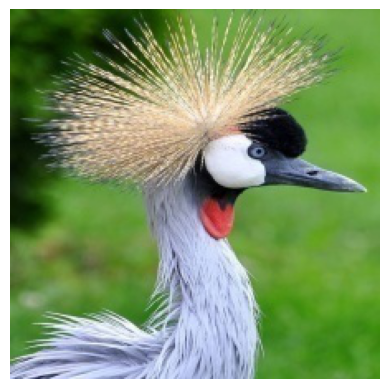

In [7]:
import matplotlib.pyplot as plt
from skimage import io

# Load image
img_url = "/kaggle/input/birds-20-species-image-classification/images to predict/4.jpg"
img = io.imread(img_url)

# Display image
plt.imshow(img)
plt.axis('off')
plt.show()

In [8]:
img= train_generator[0]
print(img)

(array([[[[199.      , 194.      , 154.      ],
         [199.      , 194.      , 154.      ],
         [199.      , 194.      , 154.      ],
         ...,
         [193.15964 , 189.7598  , 130.47968 ],
         [191.21666 , 185.57407 , 127.574066],
         [190.42087 , 181.39479 , 125.81565 ]],

        [[199.      , 194.      , 154.      ],
         [199.      , 194.      , 154.      ],
         [199.      , 194.      , 154.      ],
         ...,
         [193.15013 , 189.75424 , 130.47095 ],
         [191.22379 , 185.58199 , 127.58199 ],
         [190.4177  , 181.39557 , 125.81327 ]],

        [[199.      , 194.      , 154.      ],
         [199.      , 194.      , 154.      ],
         [199.      , 194.      , 154.      ],
         ...,
         [193.14061 , 189.74869 , 130.46223 ],
         [191.23093 , 185.58992 , 127.58992 ],
         [190.41452 , 181.39636 , 125.81089 ]],

        ...,

        [[145.44456 , 138.4083  , 135.0228  ],
         [145.44456 , 138.4083  , 135.0228  

In [9]:
type(train_generator)

keras.preprocessing.image.DirectoryIterator

In [10]:
img = train_generator[0]
print(img[0].shape) # shape of the input batch
print(img[1].shape) # shape of the target labels

(32, 224, 224, 3)
(32, 20)


In [11]:
print(len(train_generator))
print(len(test_ds))
print(len(validation_ds))

101
56
57


In [12]:
from keras.layers import MaxPool2D

In [13]:
model = Sequential()
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

In [14]:
model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=20, activation="softmax"))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                    

In [16]:
import tensorflow.keras as keras

In [17]:
from keras.optimizers import Adam
opt = Adam(learning_rate=0.0001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [18]:
history =model.fit(train_generator, validation_data=validation_generator, epochs=45)

Epoch 1/45
101/101 [==============================] - 88s 686ms/step - loss: 2.9761 - accuracy: 0.0776 - val_loss: 2.7072 - val_accuracy: 0.1100
Epoch 2/45
101/101 [==============================] - 53s 527ms/step - loss: 2.6181 - accuracy: 0.1727 - val_loss: 2.5305 - val_accuracy: 0.1800
Epoch 3/45
101/101 [==============================] - 54s 530ms/step - loss: 2.2943 - accuracy: 0.2615 - val_loss: 1.8634 - val_accuracy: 0.3200
Epoch 4/45
101/101 [==============================] - 53s 526ms/step - loss: 1.9088 - accuracy: 0.3759 - val_loss: 1.5236 - val_accuracy: 0.5200
Epoch 5/45
101/101 [==============================] - 54s 531ms/step - loss: 1.6880 - accuracy: 0.4613 - val_loss: 1.1092 - val_accuracy: 0.6200
Epoch 6/45
101/101 [==============================] - 54s 533ms/step - loss: 1.4714 - accuracy: 0.5309 - val_loss: 0.9606 - val_accuracy: 0.6800
Epoch 7/45
101/101 [==============================] - 54s 528ms/step - loss: 1.3020 - accuracy: 0.5695 - val_loss: 0.9712 - val_ac

In [19]:
n_categories = len(os.listdir('/kaggle/input/birds-20-species-image-classification/train'))# number of categories print(n_categories)

In [27]:
n_categories

20

In [20]:
results =pd.DataFrame(history.history)
results.head()

,loss,accuracy,val_loss,val_accuracy
0,2.976104,0.077618,2.707188,0.11
1,2.618079,0.172693,2.530490,0.18
2,2.294325,0.261534,1.863408,0.32
3,1.908793,0.375935,1.523601,0.52
4,1.687971,0.461347,1.109184,0.62


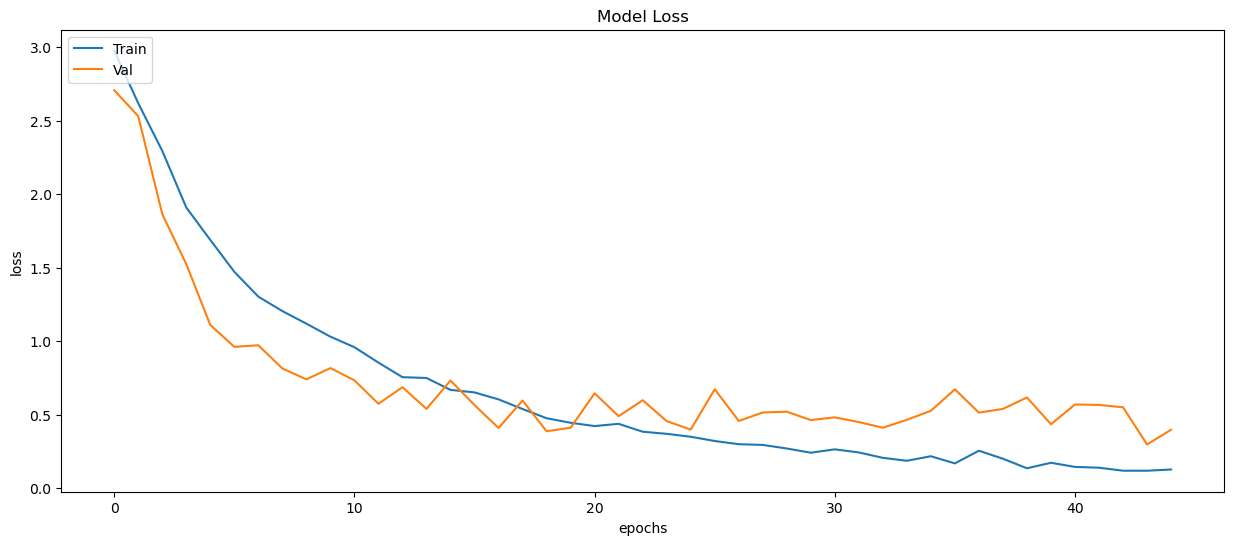

In [21]:
plt.figure(figsize=(15,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['Train','Val'], loc= 'upper left')
plt.show()

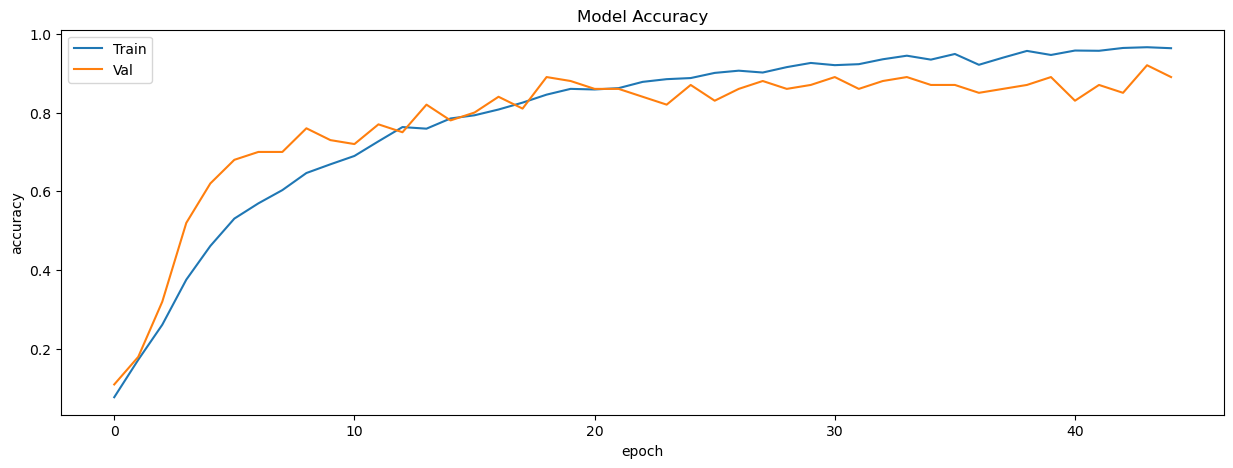

In [22]:
plt.figure(figsize=(15,5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [23]:
y_test_1 = test_generator.classes
y_pred_1 =model.predict(test_generator)
y_pred_1 = np.argmax(y_pred_1,axis=1)

4/4 [==============================] - 1s 242ms/step


In [24]:
results =model.evaluate(test_generator)

4/4 [==============================] - 1s 92ms/step - loss: 0.4036 - accuracy: 0.9200


In [30]:
from sklearn.metrics import classification_report

print(classification_report(y_test_1, y_pred_1))

              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       0.80      0.80      0.80         5
           2       0.83      1.00      0.91         5
           3       1.00      1.00      1.00         5
           4       0.83      1.00      0.91         5
           5       0.71      1.00      0.83         5
           6       1.00      1.00      1.00         5
           7       1.00      1.00      1.00         5
           8       1.00      1.00      1.00         5
           9       1.00      0.60      0.75         5
          10       0.83      1.00      0.91         5
          11       1.00      1.00      1.00         5
          12       1.00      0.80      0.89         5
          13       1.00      1.00      1.00         5
          14       0.67      0.80      0.73         5
          15       1.00      1.00      1.00         5
          16       1.00      1.00      1.00         5
          17       1.00    

1/1 [==============================] - 0s 24ms/step


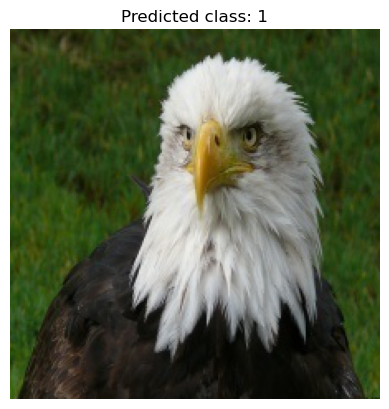

In [31]:

from PIL import Image
import os
import numpy as np
import matplotlib.pyplot as plt

image_directory = '/kaggle/input/birds-20-species-image-classification/images to predict'
img_size = 224

images = [] 
for filename in os.listdir(image_directory):
    path = os.path.join(image_directory, filename)
    img = Image.open(path)
    img = img.resize((img_size, img_size))
    images.append(img)

images = np.array([np.array(img) for img in images])
images = images / 255.0

predictions = model.predict(images)

# Select image to display
img_index = 0

# Get predicted class label
class_label = np.argmax(predictions[img_index])

# Display image and predicted class label
plt.imshow(images[img_index])
plt.axis('off')
plt.title('Predicted class: ' + str(class_label))
plt.show()


In [35]:
for i in range(len(images)):
    predicted_class = np.argmax(predictions[i])
    class_probability = predictions[i, predicted_class]
    print(f'Predicted class for {i+1}.jpg : {validation_ds[predicted_class]}')
    print('Class probability:', class_probability)

Predicted class for 1.jpg : k
Class probability: 0.09595645
Predicted class for 2.jpg : n
Class probability: 0.10256329
Predicted class for 3.jpg : n
Class probability: 0.110731415
Predicted class for 4.jpg : k
Class probability: 0.094510406
Predicted class for 5.jpg : k
Class probability: 0.09241298
Predicted class for 6.jpg : r
Class probability: 0.093502074
